In [1]:
!pip install pandas numpy scikit-learn matplotlib seaborn
!pip install factor-analyzer scipy pandas numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor-analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42622 sha256=6765c2b4f3e0046755e0bc91dc4099be56c5ef960e0a3ceb4e999b61705c7e13
  Stored in directory: /root/.cache/pip/wheels/fa/f7/53/a55a8a56668a6fe0199e0e02b6e0ae3007ec35cdf6e4c25df7
Successfully built factor-analyzer



### **Reliability Test (Cronbach's Alpha)**

In [2]:
import pandas as pd
import numpy as np

# Load dataset
file1 = '/content/analysis cap.xlsx'  # Replace with your file path
data1 = pd.read_excel(file1)

# Select only numeric columns for reliability testing
df_numeric = data1.select_dtypes(include=['float64', 'int64'])

# Function to calculate Cronbach's Alpha
def cronbach_alpha(df):
    df_corr = df.corr()  # Compute correlation matrix
    N = df.shape[1]  # Number of items
    variance_sum = np.sum(df.var(axis=0, ddof=1))  # Sum of variances
    total_variance = np.var(df.sum(axis=1), ddof=1)  # Variance of total score

    alpha = (N / (N - 1)) * (1 - (variance_sum / total_variance))
    return alpha

# Calculate and print Cronbach’s Alpha
alpha_value = cronbach_alpha(df_numeric)
print(f"Cronbach's Alpha: {alpha_value:.4f}")

# Interpretation Guide:
if alpha_value >= 0.9:
    print("Excellent Reliability")
elif alpha_value >= 0.8:
    print("Good Reliability")
elif alpha_value >= 0.7:
    print("Acceptable Reliability")
elif alpha_value >= 0.6:
    print("Questionable Reliability")
elif alpha_value >= 0.5:
    print("Poor Reliability")
else:
    print("Unacceptable Reliability")


Cronbach's Alpha: 0.9824
Excellent Reliability


Data Preprocessing Handling Missing Values (Imputation or Removal)
✅ Handling Duplicates
✅ Outlier Detection & Removal
✅ Encoding Categorical Variables
✅ Feature Scaling

In [5]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load dataset
file1 = '/content/analysis cap.xlsx'  # Replace with the correct file path
data1 = pd.read_excel(file1)

# Display basic information
print("Initial Dataset Shape:", data1.shape)
print("\nMissing Values per Column:\n", data1.isnull().sum())

# Step 1: Handling Missing Values
# Drop columns with more than 40% missing values
threshold = 0.4 * len(data1)
data1 = data1.dropna(axis=1, thresh=threshold)

# Separate numerical and categorical columns
num_cols = data1.select_dtypes(include=['float64', 'int64']).columns
cat_cols = data1.select_dtypes(include=['object']).columns

# Impute missing values (Mean for numerical, Most Frequent for categorical)
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

if len(num_cols) > 0:
    data1[num_cols] = num_imputer.fit_transform(data1[num_cols])
if len(cat_cols) > 0:
    data1[cat_cols] = cat_imputer.fit_transform(data1[cat_cols])

# Confirm no missing values remain
print("\nMissing Values After Imputation:", data1.isnull().sum().sum())

# Step 2: Handling Duplicates
duplicates = data1.duplicated().sum()
if duplicates > 0:
    data1 = data1.drop_duplicates()
    print(f"\nRemoved {duplicates} duplicate rows.")

# Step 3: Outlier Detection & Removal (Using IQR)
if len(num_cols) > 0:
    Q1 = data1[num_cols].quantile(0.25)
    Q3 = data1[num_cols].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    before_outlier_removal = data1.shape[0]
    data1 = data1[~((data1[num_cols] < lower_bound) | (data1[num_cols] > upper_bound)).any(axis=1)]
    after_outlier_removal = data1.shape[0]

    print(f"\nRemoved {before_outlier_removal - after_outlier_removal} outliers.")

# Step 4: Encoding Categorical Variables
label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    data1[col] = le.fit_transform(data1[col])
    label_encoders[col] = le  # Save encoder for future reference

print("\nCategorical Variables Encoded.")

# Step 5: Feature Scaling (Standardization)
if len(num_cols) > 0:
    scaler = StandardScaler()
    data1[num_cols] = scaler.fit_transform(data1[num_cols])
    print("\nFeature Scaling Applied (Standardization).")

# Final Dataset Overview
print("\nFinal Dataset Shape:", data1.shape)

# Save the cleaned dataset
output_file = '/content/cleaned_analysis_cap.csv'
data1.to_csv(output_file, index=False)
print(f"\nPreprocessed data saved as '{output_file}'.")


Initial Dataset Shape: (772, 32)

Missing Values per Column:
 WRI.Country    0
Year           0
ISO3.Code      0
X              0
XI_01          0
XI_02          0
XI_03          0
XI_04          0
XC_01a         0
XC_01b         0
XC_01c         0
XC_01d         0
XC_01e         0
XC_01f         0
XC_02a         0
XC_02b         0
XC_02c         0
XC_02d         0
XC_02e         0
XC_02f         0
XC_03a         0
XC_03b         0
XC_03c         0
XC_03d         0
XC_03e         0
XC_03f         0
XC_04a         0
XC_04b         0
XC_04c         0
XC_04d         0
XC_04e         0
XC_04f         0
dtype: int64

Missing Values After Imputation: 0

Removed 192 outliers.

Categorical Variables Encoded.

Feature Scaling Applied (Standardization).

Final Dataset Shape: (580, 32)

Preprocessed data saved as '/content/cleaned_analysis_cap.csv'.


## **Exploratory Data Analysis (EDA)**

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772 entries, 0 to 771
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   WRI.Country  772 non-null    object 
 1   Year         772 non-null    int64  
 2   ISO3.Code    772 non-null    object 
 3   X            772 non-null    float64
 4   XI_01        772 non-null    float64
 5   XI_02        772 non-null    float64
 6   XI_03        772 non-null    float64
 7   XI_04        772 non-null    float64
 8   XC_01a       772 non-null    float64
 9   XC_01b       772 non-null    float64
 10  XC_01c       772 non-null    float64
 11  XC_01d       772 non-null    float64
 12  XC_01e       772 non-null    float64
 13  XC_01f       772 non-null    float64
 14  XC_02a       772 non-null    float64
 15  XC_02b       772 non-null    float64
 16  XC_02c       772 non-null    float64
 17  XC_02d       772 non-null    float64
 18  XC_02e       772 non-null    

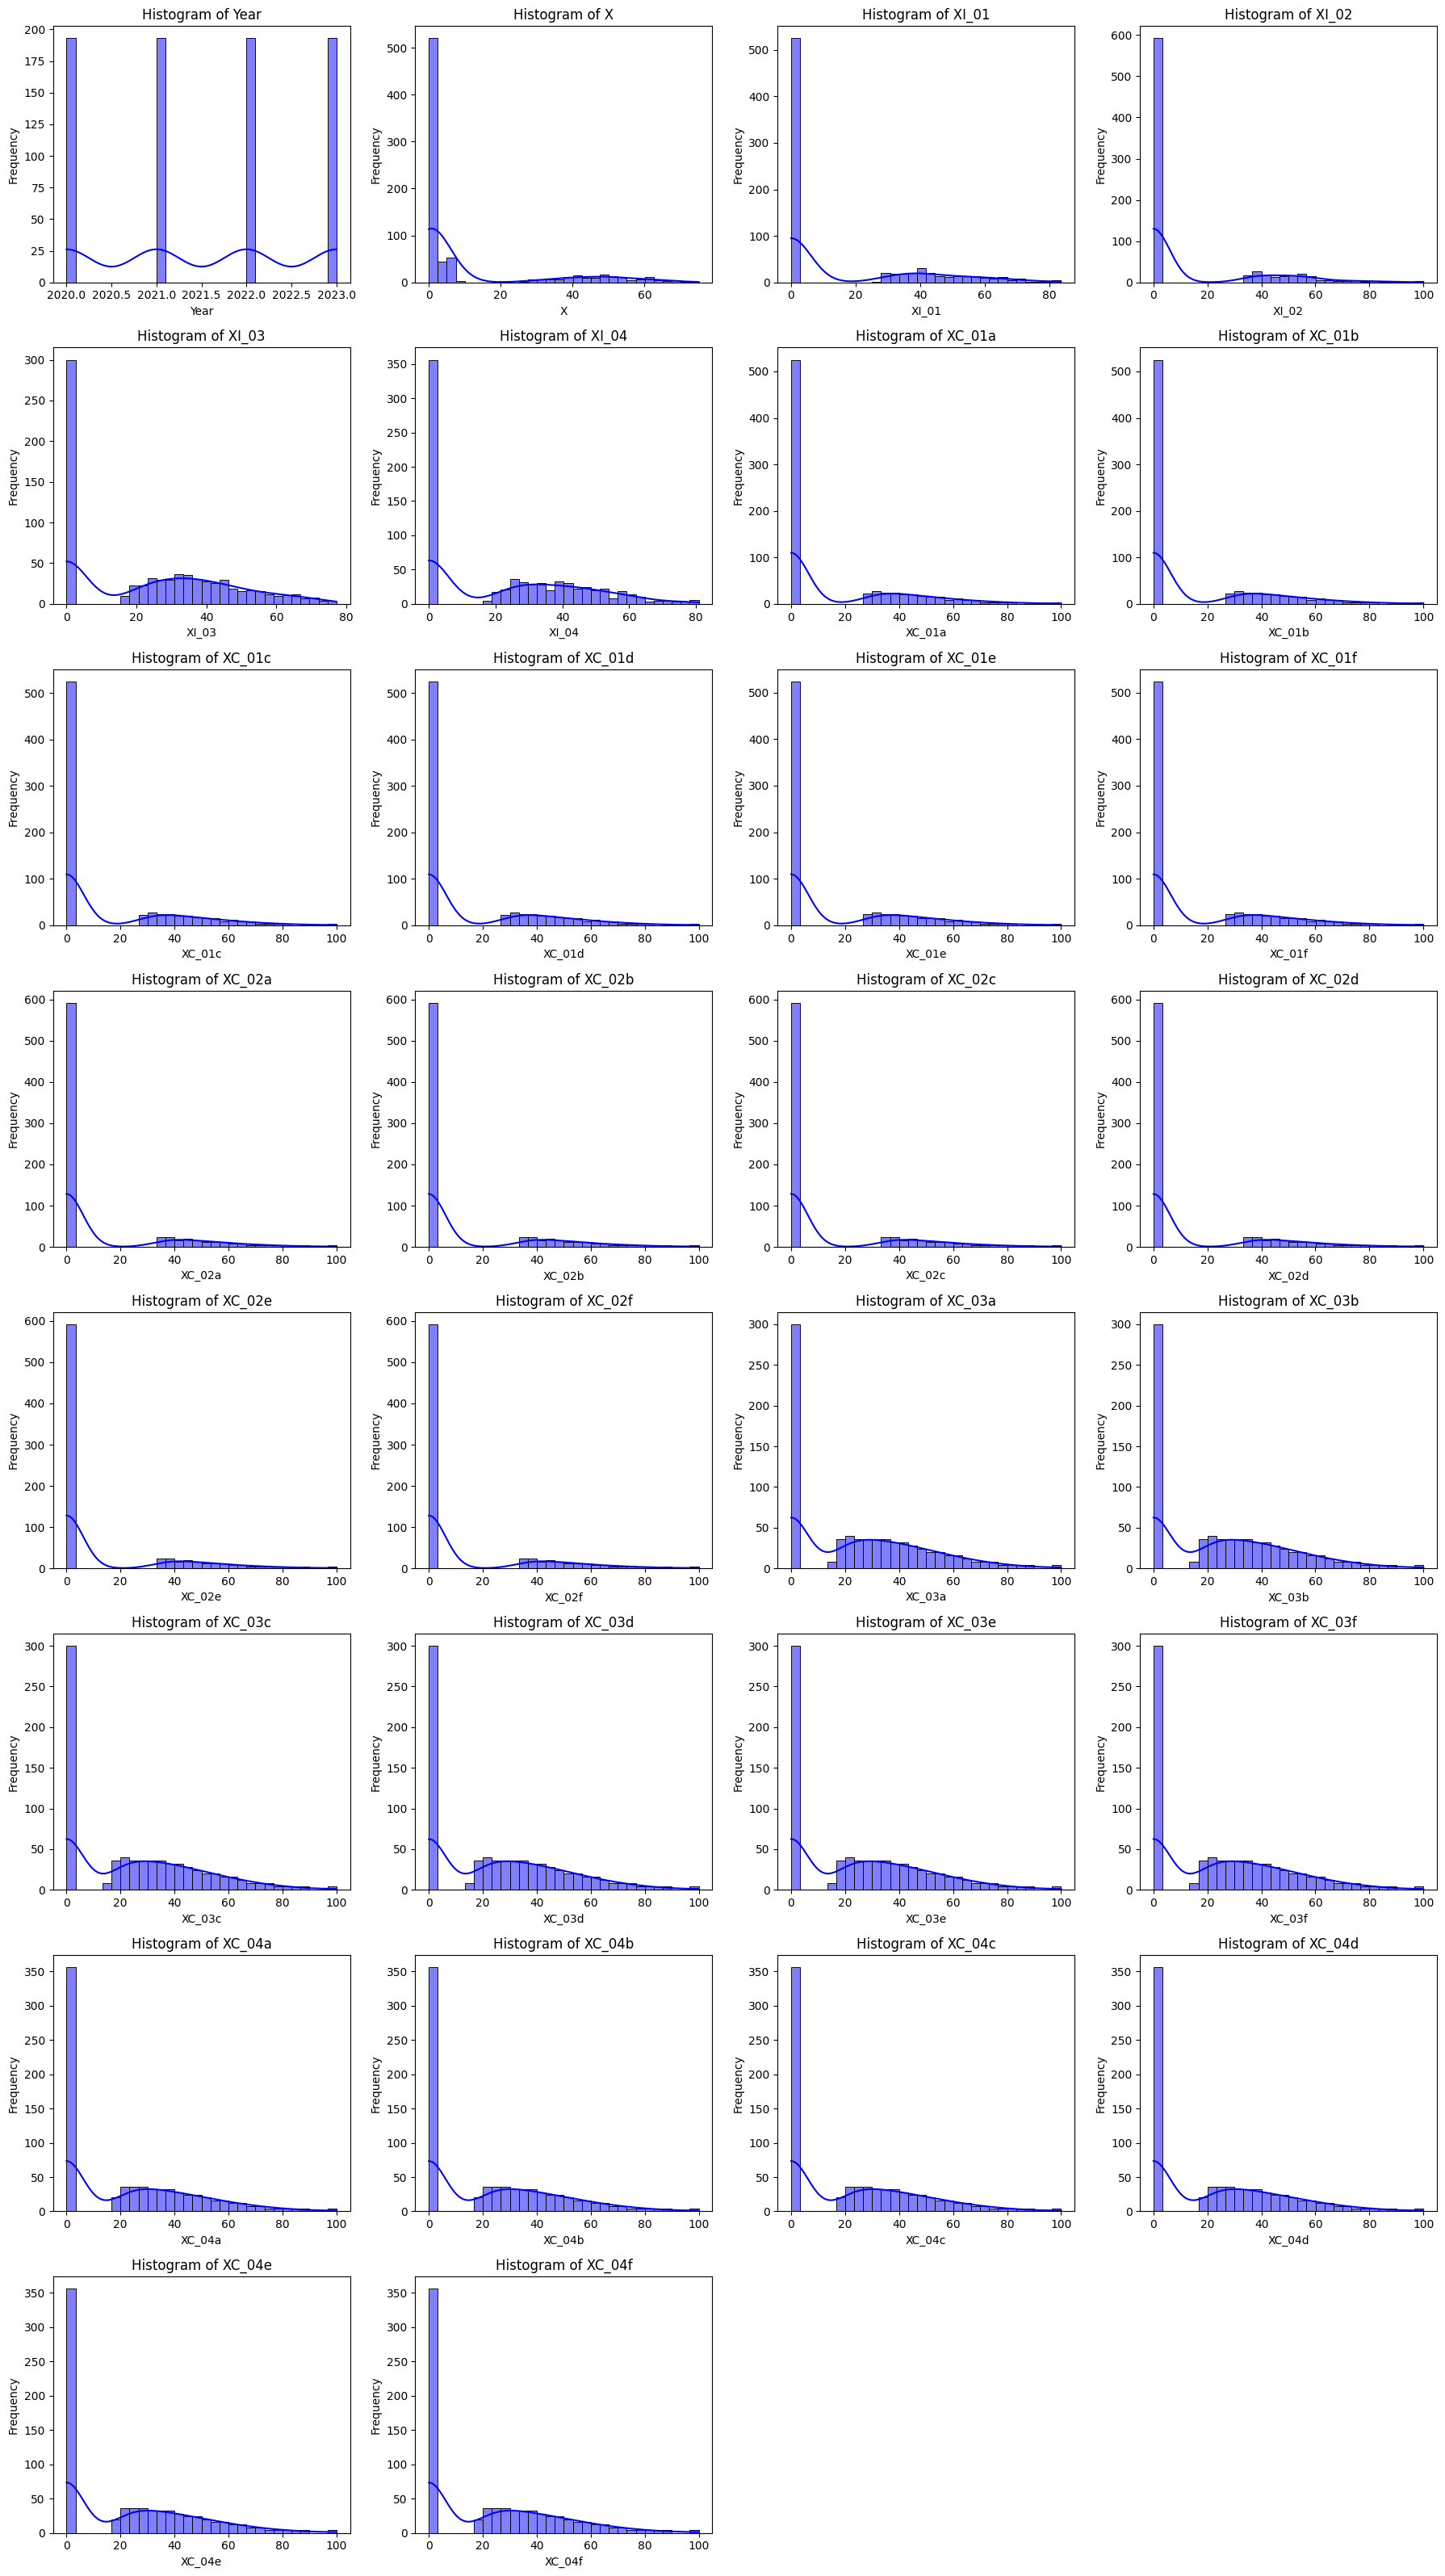

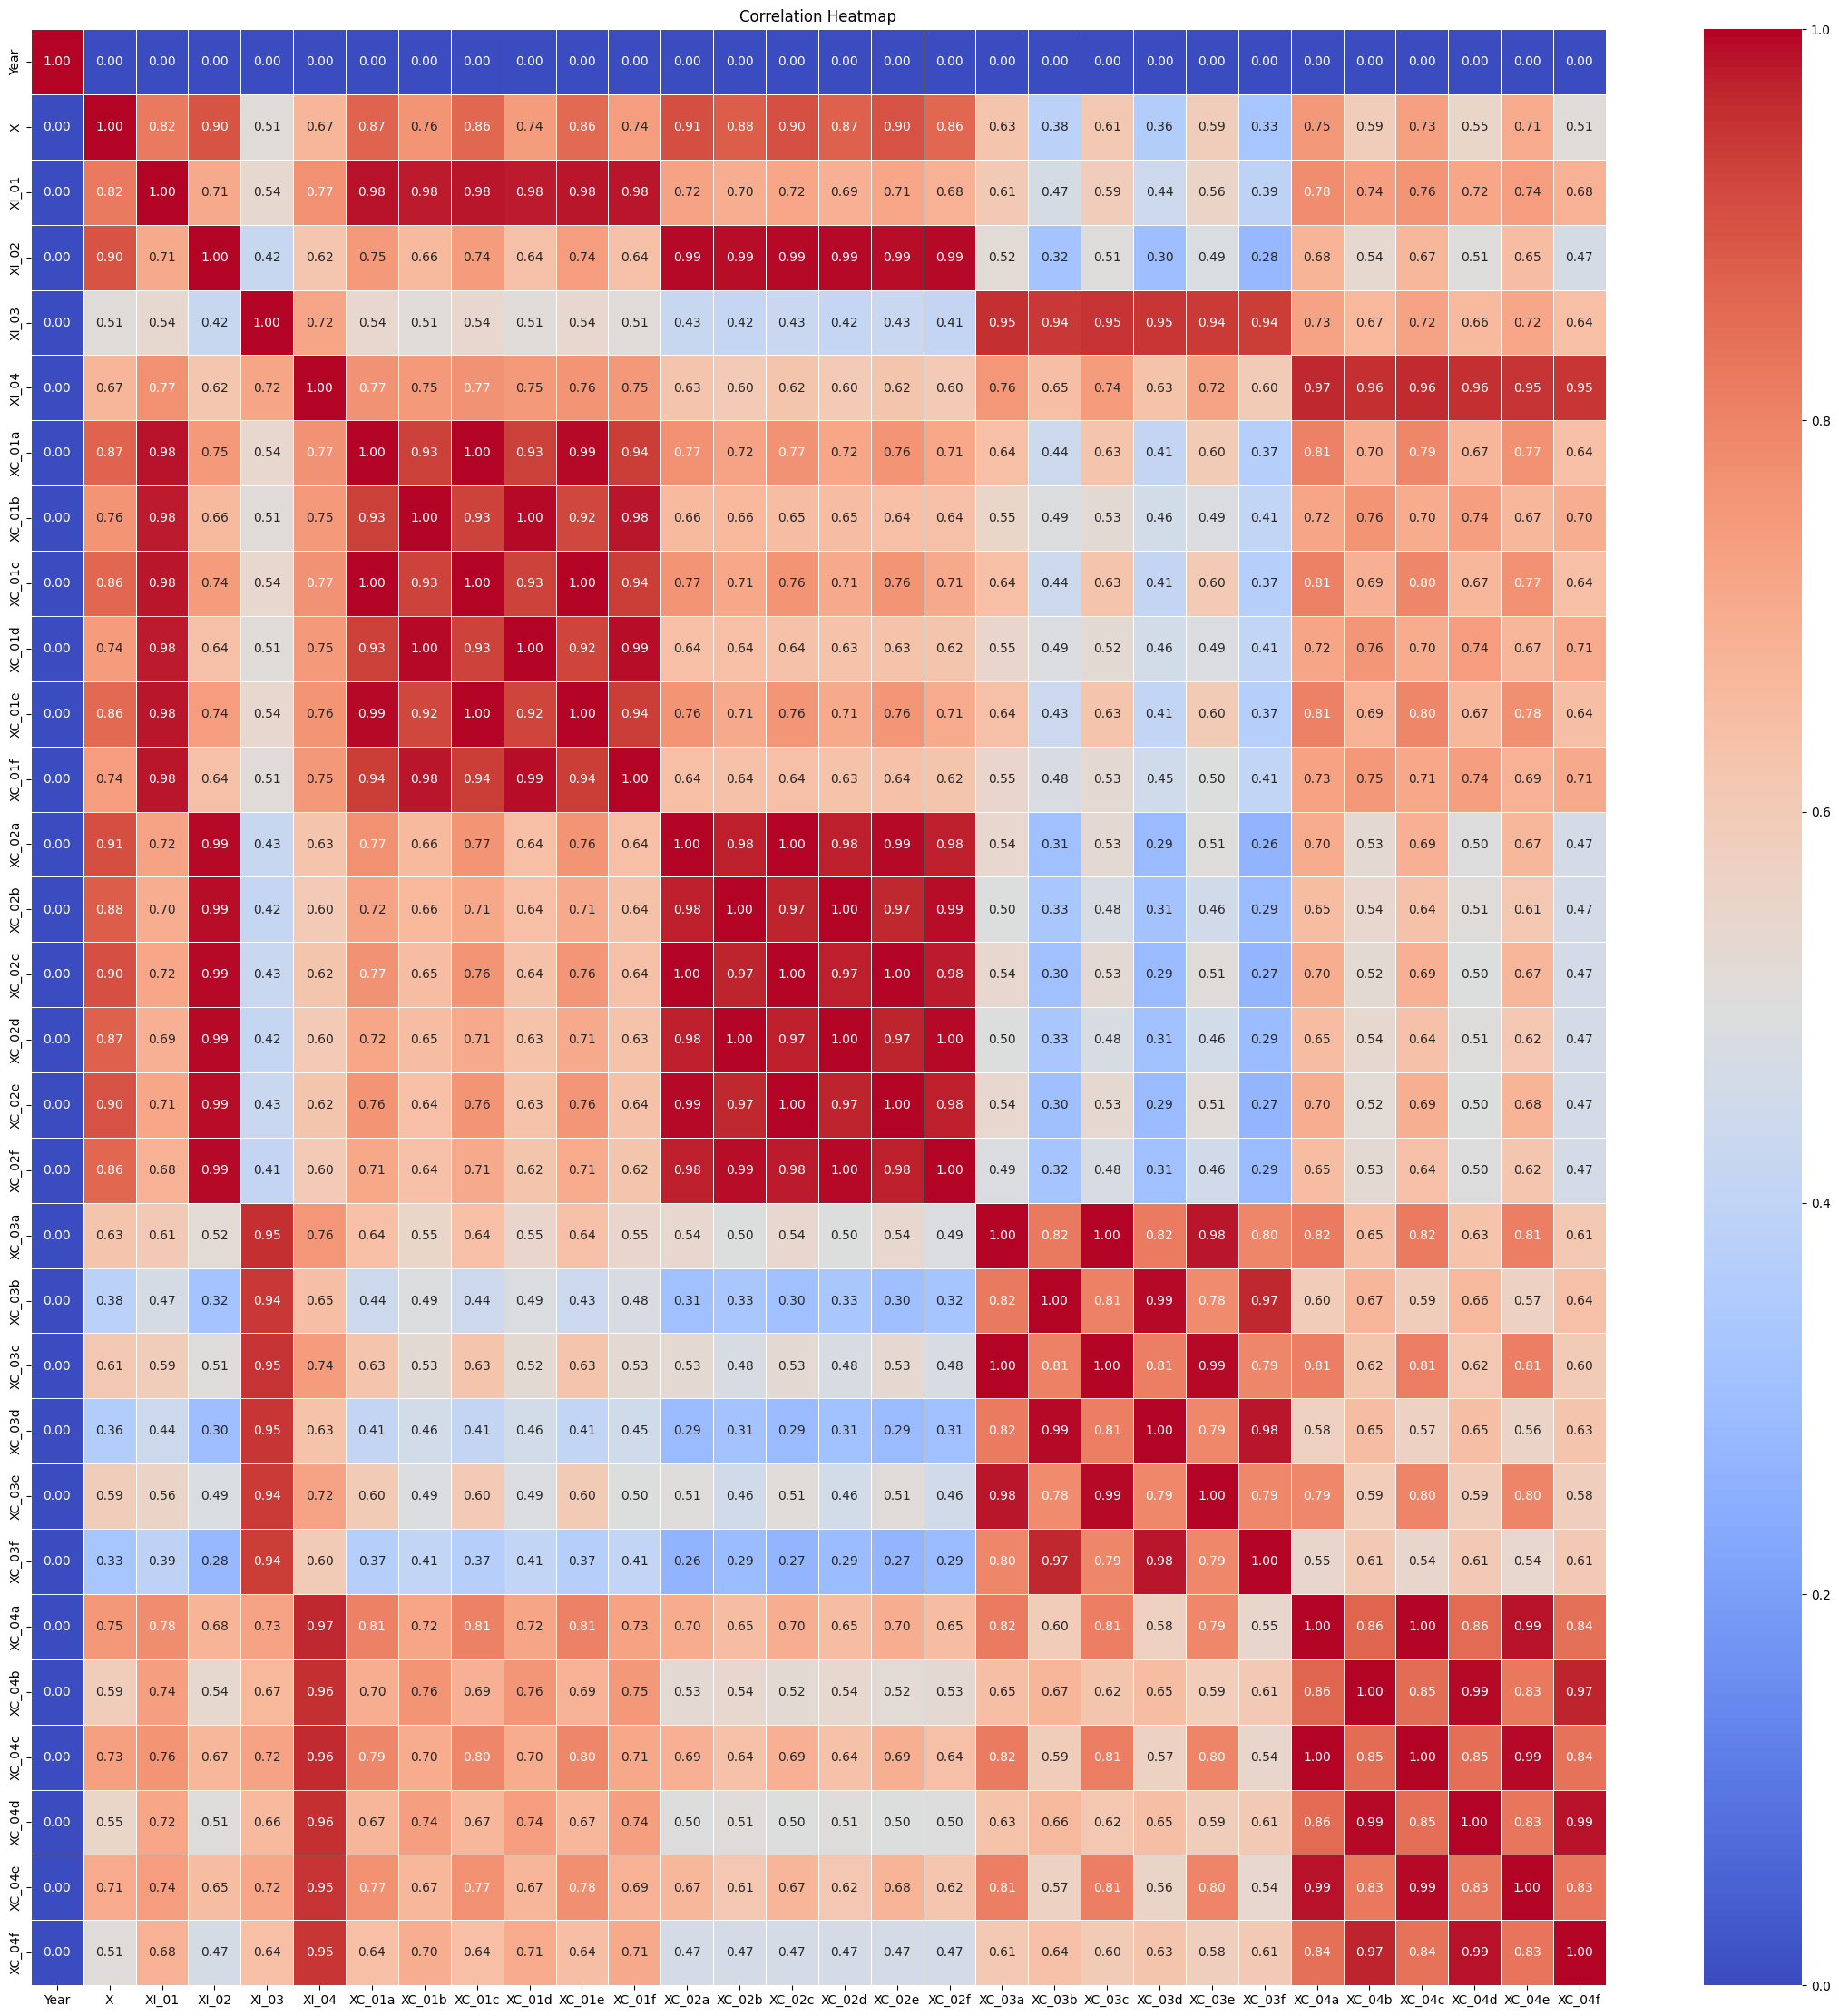

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file1 = '/content/analysis cap.xlsx'  # Ensure the file path is correct
data1 = pd.read_excel(file1)

# Display basic information
print("Dataset Information:")
print(data1.info())

# Summary statistics
print("\nSummary Statistics:")
print(data1.describe())

# Check for missing values
print("\nMissing Values:")
print(data1.isnull().sum())

# Drop non-numeric columns for analysis
num_cols = data1.select_dtypes(include=['int64', 'float64']).columns

# Set up subplots for histograms
num_features = len(num_cols)
cols = 4  # Number of columns in the subplot grid
rows = (num_features // cols) + (num_features % cols > 0)  # Adjust rows dynamically

fig, axes = plt.subplots(rows, cols, figsize=(18, 4 * rows))
axes = axes.flatten()

# Plot histograms for each numeric column
for i, col in enumerate(num_cols):
    sns.histplot(data1[col], bins=30, kde=True, ax=axes[i], color='blue')
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(28, 28))
sns.heatmap(data1[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


# **Finds highly correlated feature pairs (threshold > 0.85)**


Highly Correlated Features (Threshold > 0.85):
XI_02 ↔ X | Correlation: 0.90
XC_01a ↔ X | Correlation: 0.87
XC_01a ↔ XI_01 | Correlation: 0.98
XC_01b ↔ XI_01 | Correlation: 0.98
XC_01b ↔ XC_01a | Correlation: 0.93
XC_01c ↔ X | Correlation: 0.86
XC_01c ↔ XI_01 | Correlation: 0.98
XC_01c ↔ XC_01a | Correlation: 1.00
XC_01c ↔ XC_01b | Correlation: 0.93
XC_01d ↔ XI_01 | Correlation: 0.98
XC_01d ↔ XC_01a | Correlation: 0.93
XC_01d ↔ XC_01b | Correlation: 1.00
XC_01d ↔ XC_01c | Correlation: 0.93
XC_01e ↔ X | Correlation: 0.86
XC_01e ↔ XI_01 | Correlation: 0.98
XC_01e ↔ XC_01a | Correlation: 0.99
XC_01e ↔ XC_01b | Correlation: 0.92
XC_01e ↔ XC_01c | Correlation: 1.00
XC_01e ↔ XC_01d | Correlation: 0.92
XC_01f ↔ XI_01 | Correlation: 0.98
XC_01f ↔ XC_01a | Correlation: 0.94
XC_01f ↔ XC_01b | Correlation: 0.98
XC_01f ↔ XC_01c | Correlation: 0.94
XC_01f ↔ XC_01d | Correlation: 0.99
XC_01f ↔ XC_01e | Correlation: 0.94
XC_02a ↔ X | Correlation: 0.91
XC_02a ↔ XI_02 | Correlation: 0.99
XC_02b ↔ X | 

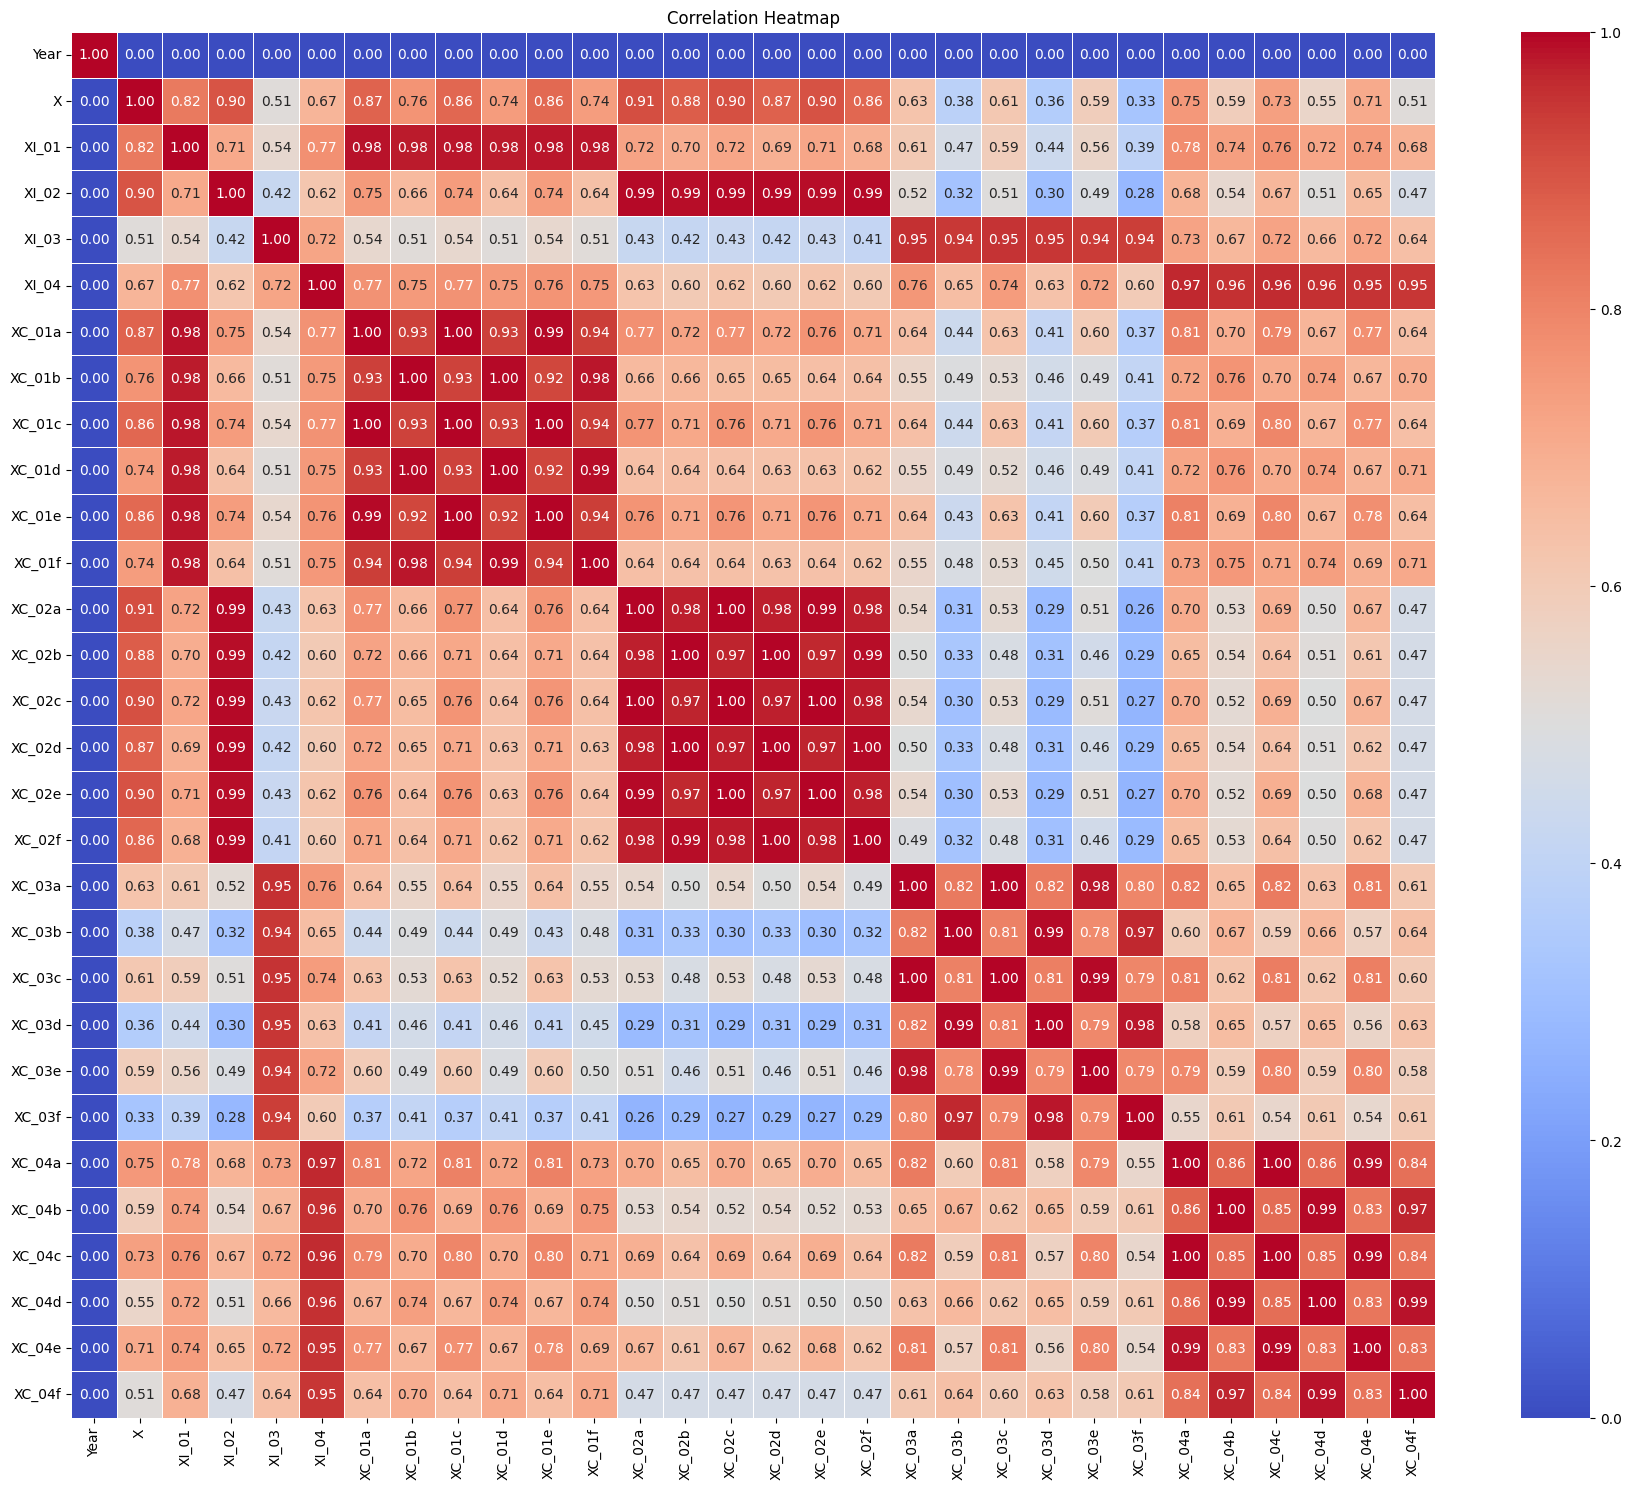

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file1 = '/content/analysis cap.xlsx'  # Ensure the file path is correct
data1 = pd.read_excel(file1)

# Drop non-numeric columns
num_cols = data1.select_dtypes(include=['int64', 'float64']).columns

# Compute correlation matrix
corr_matrix = data1[num_cols].corr().abs()

# Set correlation threshold (e.g., 0.85)
threshold = 0.85

# Find highly correlated features
highly_correlated = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] > threshold:
            col1 = corr_matrix.columns[i]
            col2 = corr_matrix.columns[j]
            highly_correlated.append((col1, col2, corr_matrix.iloc[i, j]))

# Print highly correlated columns
if highly_correlated:
    print("\nHighly Correlated Features (Threshold > 0.85):")
    for col1, col2, corr_value in highly_correlated:
        print(f"{col1} ↔ {col2} | Correlation: {corr_value:.2f}")
else:
    print("No highly correlated features found.")

# Plot heatmap for visualization
plt.figure(figsize=(22, 18))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
file1 = '/content/analysis cap.xlsx'  # Ensure the file path is correct
data1 = pd.read_excel(file1)

# Display dataset info
print("\nDataset Overview:")
print(data1.info())

# Check for possible target columns based on unique values
print("\nColumns with unique value counts:")
for col in data1.columns:
    unique_values = data1[col].nunique()
    print(f"{col}: {unique_values} unique values")

# Identify categorical/binary target candidates
categorical_cols = data1.select_dtypes(include=['object']).columns
binary_cols = [col for col in data1.columns if data1[col].nunique() == 2]

print("\nPossible Categorical Target Variables:", categorical_cols)
print("Possible Binary Target Variables:", binary_cols)

# Find the most correlated column (potential target)
num_cols = data1.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = data1[num_cols].corr()

# Identify the column with the highest average correlation
avg_corr = corr_matrix.abs().mean().sort_values(ascending=False)
print("\nFeature Correlation Ranking:")
print(avg_corr)

# Suggest the best possible target variable
suggested_target = avg_corr.index[0]  # Column with highest average correlation
print(f"\n🚀 Suggested Target Variable: {suggested_target}")



Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772 entries, 0 to 771
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   WRI.Country  772 non-null    object 
 1   Year         772 non-null    int64  
 2   ISO3.Code    772 non-null    object 
 3   X            772 non-null    float64
 4   XI_01        772 non-null    float64
 5   XI_02        772 non-null    float64
 6   XI_03        772 non-null    float64
 7   XI_04        772 non-null    float64
 8   XC_01a       772 non-null    float64
 9   XC_01b       772 non-null    float64
 10  XC_01c       772 non-null    float64
 11  XC_01d       772 non-null    float64
 12  XC_01e       772 non-null    float64
 13  XC_01f       772 non-null    float64
 14  XC_02a       772 non-null    float64
 15  XC_02b       772 non-null    float64
 16  XC_02c       772 non-null    float64
 17  XC_02d       772 non-null    float64
 18  XC_02e       772 non-null    fl

# **Structural Equation Modeling (SEM) is used to analyze complex relationships between multiple variables, combining factor analysis and regression modeling**

In [12]:
!pip install semopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 9.1 MB/s eta 0:00:00
  Created wheel for semopy: filename=semopy-2.3.11-py3-none-any.whl size=1659681 sha256=70c10421f92a9c23519d789f978ebebef845569826014af77153cfc6749ed3e4
  Stored in directory: /root/.cache/pip/wheels/d2/9a/31/fae291ff6a649bad125037eef8c7cc63d8c542e14bdcccea37
Successfully built semopy


     lval  op    rval   Estimate  Std. Err     z-value       p-value
0   XI_01   ~  XC_01a  -0.225748  0.031301   -7.212054  5.511147e-13
1   XI_01   ~  XC_01b   0.458477  0.004447  103.100215  0.000000e+00
2   XI_01   ~  XC_01c   0.752917  0.030079   25.031003  0.000000e+00
3   XI_02   ~  XC_02a  -0.215789  0.017170  -12.567978  0.000000e+00
4   XI_02   ~  XC_02b   0.464795  0.004703   98.825551  0.000000e+00
5   XI_02   ~  XC_02c   0.744461  0.015941   46.699981  0.000000e+00
6   XI_03   ~  XC_03a  -0.466832  0.031310  -14.910029  0.000000e+00
7   XI_03   ~  XC_03b   0.486041  0.004554  106.727073  0.000000e+00
8   XI_03   ~  XC_03c   0.948836  0.030189   31.429418  0.000000e+00
9   XI_04   ~  XC_04a  -0.399127  0.032574  -12.252947  0.000000e+00
10  XI_04   ~  XC_04b   0.487806  0.004838  100.820060  0.000000e+00
11  XI_04   ~  XC_04c   0.882973  0.031096   28.395340  0.000000e+00
12      X   ~   XI_01   0.321922  0.018850   17.078036  0.000000e+00
13      X   ~   XI_02   0.529965  

TypeError: 'module' object is not callable

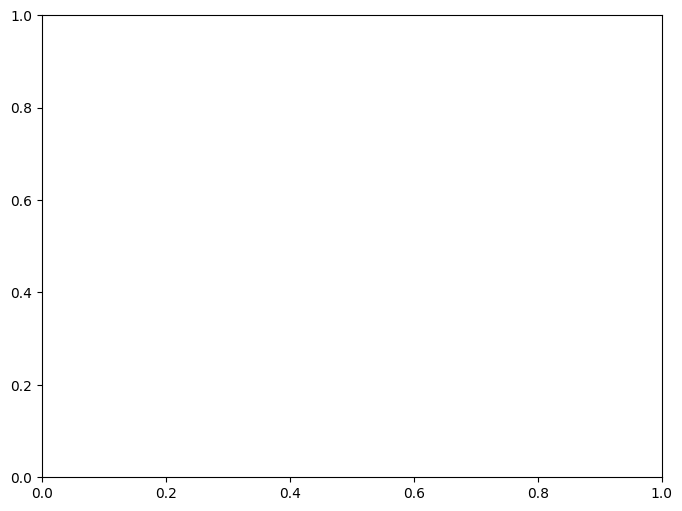

In [15]:
import pandas as pd
import numpy as np
from semopy import Model, semplot

# Load dataset
file_path = "/content/analysis cap.xlsx"  # Ensure correct path
data = pd.read_excel(file_path)

# Drop non-numeric columns ('WRI.Country', 'ISO3.Code') & 'Year'
df_numeric = data.drop(columns=['WRI.Country', 'ISO3.Code', 'Year'], errors='ignore')

# Handle missing values (replace NaNs with column mean)
df_numeric.fillna(df_numeric.mean(), inplace=True)

# Define SEM Model based on dataset columns
model_desc = """
X ~ XI_01 + XI_02 + XI_03 + XI_04  # Overall risk influenced by exposure & vulnerability
XI_01 ~ XC_01a + XC_01b + XC_01c   # Exposure affected by sub-indicators
XI_02 ~ XC_02a + XC_02b + XC_02c   # Vulnerability influenced by sub-factors
XI_03 ~ XC_03a + XC_03b + XC_03c   # Coping capacity factors
XI_04 ~ XC_04a + XC_04b + XC_04c   # Adaptive capacity factors
"""

# Fit SEM Model
model = Model(model_desc)
model.fit(df_numeric)

# Print SEM results
print(model.inspect())

# Visualize SEM Path Diagram
from semopy import plot
import matplotlib.pyplot as plt

# Generate SEM Path Diagram
fig, ax = plt.subplots(figsize=(8, 6))
plot(model, ax=ax)
plt.show()


<ipython-input-17-32b60aac3782>:14: FutureWarning: The 'downcast' keyword in fillna is deprecated and will be removed in a future version. Use res.infer_objects(copy=False) to infer non-object dtype, or pd.to_numeric with the 'downcast' keyword to downcast numeric results.
  df_numeric.fillna(df_numeric.mean(), inplace=True, downcast='infer')


      lval  op    rval      Estimate    Std. Err        z-value   p-value
0    XI_01   ~       X  1.000000e+00           -              -         -
1    XI_02   ~       X  2.477527e+02   16.677198      14.855773       0.0
2    XI_03   ~       X  1.780897e+02   19.856184        8.96898       0.0
3    XI_04   ~       X  5.366363e+02   14.480407       37.05948       0.0
4        X   ~   XI_01  8.222227e+02   17.318483      47.476599       0.0
5        X   ~   XI_02  1.569396e+02   25.922952        6.05408       0.0
6        X   ~   XI_03  8.031096e+02   21.686783      37.032217       0.0
7        X   ~   XI_04 -1.708915e+03   11.193474    -152.670625       0.0
8   XC_01a   ~   XI_01  1.000000e+00           -              -         -
9   XC_01b   ~   XI_01  9.318956e-01    0.011682      79.769222       0.0
10  XC_01c   ~   XI_01  9.985617e-01    0.001798     555.260158       0.0
11  XC_02a   ~   XI_02  1.000000e+00           -              -         -
12  XC_02b   ~   XI_02  9.753460e-01  

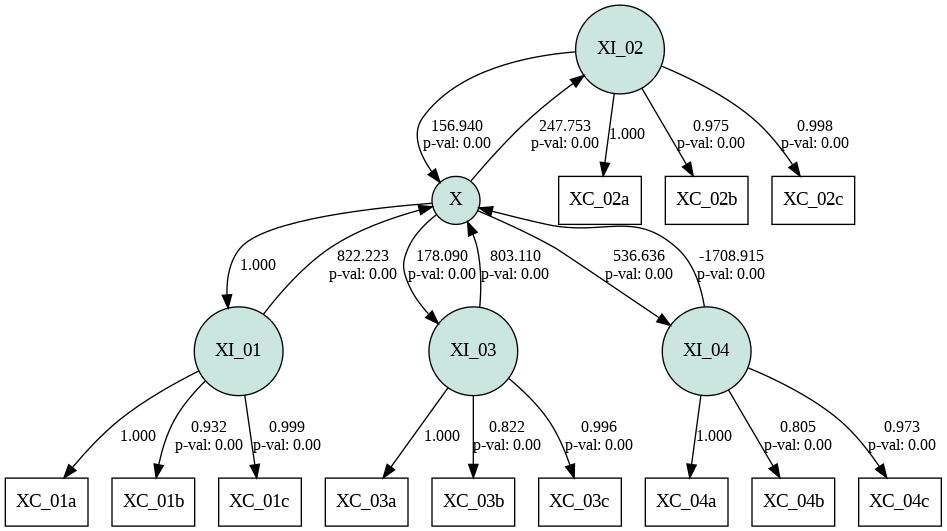

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from semopy import Model, semplot

# Load dataset
file_path = "/content/analysis cap.xlsx"  # Ensure correct file path
data = pd.read_excel(file_path)

# Drop non-numeric columns ('WRI.Country', 'ISO3.Code') & 'Year'
df_numeric = data.drop(columns=['WRI.Country', 'ISO3.Code', 'Year'], errors='ignore')

# Handle missing values (replace NaNs with column mean)
df_numeric.fillna(df_numeric.mean(), inplace=True, downcast='infer')

# Define SEM Model (Fixed Syntax)
model_desc = """
    X =~ XI_01 + XI_02 + XI_03 + XI_04   # Overall risk as a latent variable
    XI_01 =~ XC_01a + XC_01b + XC_01c   # Exposure as a latent factor
    XI_02 =~ XC_02a + XC_02b + XC_02c   # Vulnerability as a latent factor
    XI_03 =~ XC_03a + XC_03b + XC_03c   # Coping capacity
    XI_04 =~ XC_04a + XC_04b + XC_04c   # Adaptive capacity
    X ~ XI_01 + XI_02 + XI_03 + XI_04   # Regression relationship
"""

# Fit SEM Model
model = Model(model_desc)
model.fit(df_numeric)

# Print SEM Results
print(model.inspect())

# Visualize SEM Path Diagram
semplot(model, filename="sem_model.png")

# Show the Image
from IPython.display import display
from PIL import Image

img = Image.open("sem_model.png")
display(img)


Latent Variables (Ovals):

X: This represents your overall latent variable, likely "Overall Risk" or something similar, as defined in your model. It's influenced by the four latent factors (XI_01 to XI_04).
XI_01: Likely "Exposure to Hazards" (based on your model definition).
XI_02: Likely "Vulnerability".
XI_03: Likely "Lack of Coping Capacity".
XI_04: Likely "Lack of Adaptive Capacity".
Observed Variables (Rectangles):

XC_01a, XC_01b, XC_01c: Indicators/measures contributing to XI_01 (Exposure).
XC_02a, XC_02b, XC_02c: Indicators/measures contributing to XI_02 (Vulnerability).
XC_03a, XC_03b, XC_03c: Indicators/measures contributing to XI_03 (Coping Capacity).
XC_04a, XC_04b, XC_04c: Indicators/measures contributing to XI_04 (Adaptive Capacity).
Arrows:

One-headed arrows: Indicate directional relationships (e.g., XC_01a influences XI_01).
Two-headed arrows: Indicate correlations or covariances (not shown in your diagram, but present in the numerical output as "~~").
Numbers on Arrows:

Path coefficients: Represent the strength and direction of the relationship between variables. Standardized estimates are shown on the diagram.
p-values: Indicate the statistical significance of the relationships.  p-values less than 0.05 generally suggest a statistically significant relationship (shown as 0.00 in your diagram, meaning very highly significant).

Interpreting the Key Relationships (From the Diagram and Numerical Output)

Impact of Latent Factors on Overall Risk (X):

XI_01 (Exposure): A positive and significant effect (822.223, p < 0.001) on X. Higher exposure is associated with higher overall risk.
XI_02 (Vulnerability): A positive and significant effect (156.940, p < 0.001) on X. Higher vulnerability is associated with higher overall risk.
XI_03 (Lack of Coping Capacity): A positive and significant effect (803.110, p < 0.001) on X. Higher lack of coping capacity is associated with higher overall risk.
XI_04 (Lack of Adaptive Capacity): A negative and significant effect (-1708.915, p < 0.001) on X. This is an unexpected result. It suggests that higher lack of adaptive capacity is associated with lower overall risk. This warrants further investigation (see "Important Considerations" below).
Measurement Model (Relationships between Observed and Latent Variables):

All the paths from the observed variables (XC_01a to XC_04c) to their respective latent factors (XI_01 to XI_04) are positive and highly significant (p < 0.001). This confirms that the observed variables are good indicators of their corresponding latent factors. For instance, XC_01b and XC_01c are strongly related to XI_01 (Exposure), with path coefficients of 0.932 and 0.999, respectively.
Variance of Latent Variables:

The numerical output shows the variances and covariances of the latent variables (e.g., XI_01 ~~ XI_01). These are important for understanding the overall model fit and the amount of variance explained by the latent factors.



# **RNN Code for Time-Series Prediction**

In [21]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("/content/cleaned_analysis_cap.csv")  # Ensure the correct dataset path

# Selecting relevant numeric columns
features = ['X', 'XI_01', 'XI_02', 'XI_03', 'XI_04', 'XC_01a', 'XC_01b', 'XC_01c', 'XC_01d', 'XC_01e', 'XC_01f',
            'XC_02a', 'XC_02b', 'XC_02c', 'XC_02d', 'XC_02e', 'XC_02f', 'XC_03a', 'XC_03b', 'XC_03c', 'XC_03d',
            'XC_03e', 'XC_03f', 'XC_04a', 'XC_04b', 'XC_04c', 'XC_04d', 'XC_04e', 'XC_04f']

target = 'X'  # Assuming 'X' is the prediction target

# Drop rows with missing values
df = df.dropna()

# Normalize features
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])

# Convert to numpy arrays
X = df[features].values
y = df[target].values

# Reshape input for RNN (samples, time steps, features)
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build RNN model
model = Sequential([
    SimpleRNN(50, activation='relu', return_sequences=True, input_shape=(X.shape[1], X.shape[2])),
    Dropout(0.2),
    SimpleRNN(50, activation='relu', return_sequences=False),
    Dropout(0.2),
    Dense(1)  # Output layer for regression
])

# Compile model
model.compile(optimizer='adam', loss='mse')

# Train model
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

# Evaluate model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.0494 - val_loss: 0.0071
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0176 - val_loss: 0.0026
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0120 - val_loss: 0.0018
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0081 - val_loss: 0.0018
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0062 - val_loss: 0.0037
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0047 - val_loss: 6.9793e-04
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0087 - val_loss: 0.0019
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0038 - val_loss: 0.0017
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0052 - val_loss: 0.0013
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0059 - val_loss: 0.0010
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - val_loss: 4.5126e-04
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.00

In [23]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("/content/cleaned_analysis_cap.csv")  # Ensure the correct dataset path

# Selecting relevant numeric columns
features = ['X', 'XI_01', 'XI_02', 'XI_03', 'XI_04', 'XC_01a', 'XC_01b', 'XC_01c', 'XC_01d', 'XC_01e', 'XC_01f',
            'XC_02a', 'XC_02b', 'XC_02c', 'XC_02d', 'XC_02e', 'XC_02f', 'XC_03a', 'XC_03b', 'XC_03c', 'XC_03d',
            'XC_03e', 'XC_03f', 'XC_04a', 'XC_04b', 'XC_04c', 'XC_04d', 'XC_04e', 'XC_04f']

target = 'X'  # Assuming 'X' is the prediction target

# Drop rows with missing values
df = df.dropna()

# Normalize features
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])

# Convert to numpy arrays
X = df[features].values
y = df[target].values

# Reshape input for RNN (samples, time steps, features)
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build RNN model
model = Sequential([
    SimpleRNN(50, activation='relu', return_sequences=True, input_shape=(X.shape[1], X.shape[2])),
    Dropout(0.2),
    SimpleRNN(50, activation='relu', return_sequences=False),
    Dropout(0.2),
    Dense(1)  # Output layer for regression
])

# Compile model
model.compile(optimizer='adam', loss='mse')

# Train model
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

# Evaluate model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Get model predictions
y_pred = model.predict(X_test)

# Compute performance metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print results
print(f"Test Loss (MSE): {loss:.6f}")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 0.0693 - val_loss: 0.0051
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0182 - val_loss: 0.0029
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0101 - val_loss: 0.0021
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0098 - val_loss: 0.0022
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0076 - val_loss: 0.0067
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0091 - val_loss: 0.0013
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0066 - val_loss: 0.0013
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0062 - val_loss: 0.0026
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0056 - val_loss: 0.0011
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0033 - val_loss: 0.0017
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0027 - val_loss: 9.1762e-04
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0034 - val_loss: 0.

Compare with a Baseline Model (Linear Regression)
Compute MAE & RMSE for better insights
Visualize Predictions using an Actual vs. Predicted plot

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
=== Model Performance Comparison ===
RNN - R² Score: 0.9896, MAE: 0.0154, RMSE: 0.0265
Linear Regression - R² Score: 1.0000, MAE: 0.0000, RMSE: 0.0000


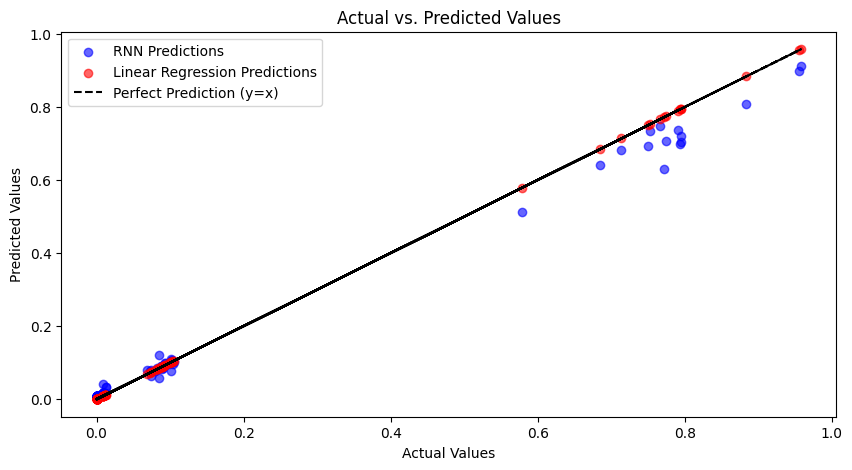

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Get RNN predictions
y_pred_rnn = model.predict(X_test)

# Baseline Model: Linear Regression
X_train_lr = X_train.reshape(X_train.shape[0], -1)  # Flatten for Linear Regression
X_test_lr = X_test.reshape(X_test.shape[0], -1)

lr_model = LinearRegression()
lr_model.fit(X_train_lr, y_train)
y_pred_lr = lr_model.predict(X_test_lr)

# Compute Metrics for RNN
r2_rnn = r2_score(y_test, y_pred_rnn)
mae_rnn = mean_absolute_error(y_test, y_pred_rnn)
rmse_rnn = np.sqrt(mean_squared_error(y_test, y_pred_rnn))

# Compute Metrics for Linear Regression
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

# Print Comparison
print("=== Model Performance Comparison ===")
print(f"RNN - R² Score: {r2_rnn:.4f}, MAE: {mae_rnn:.4f}, RMSE: {rmse_rnn:.4f}")
print(f"Linear Regression - R² Score: {r2_lr:.4f}, MAE: {mae_lr:.4f}, RMSE: {rmse_lr:.4f}")

# Plot Actual vs. Predicted
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_rnn, alpha=0.6, label="RNN Predictions", color="blue")
plt.scatter(y_test, y_pred_lr, alpha=0.6, label="Linear Regression Predictions", color="red")
plt.plot(y_test, y_test, color="black", linestyle="--", label="Perfect Prediction (y=x)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.title("Actual vs. Predicted Values")
plt.show()


In [25]:
!pip install tensorflow spektral scikit-learn matplotlib pandas networkx


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.1/140.1 kB 11.4 MB/s eta 0:00:00


LSTM & Graph Neural Network (GNN) Model with Complete Evaluation

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - loss: 0.0613 - val_loss: 0.0540
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0359 - val_loss: 0.0153
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0155 - val_loss: 0.0051
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0111 - val_loss: 0.0046
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0054 - val_loss: 0.0032
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0080 - val_loss: 0.0032
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0048 - val_loss: 0.0029
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0066 - val_loss: 0.0025
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0063 - val_loss: 0.0021
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0056 - val_loss: 0.0017
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0029 - val_loss: 0.0023
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0045 - val_loss: 0.0016

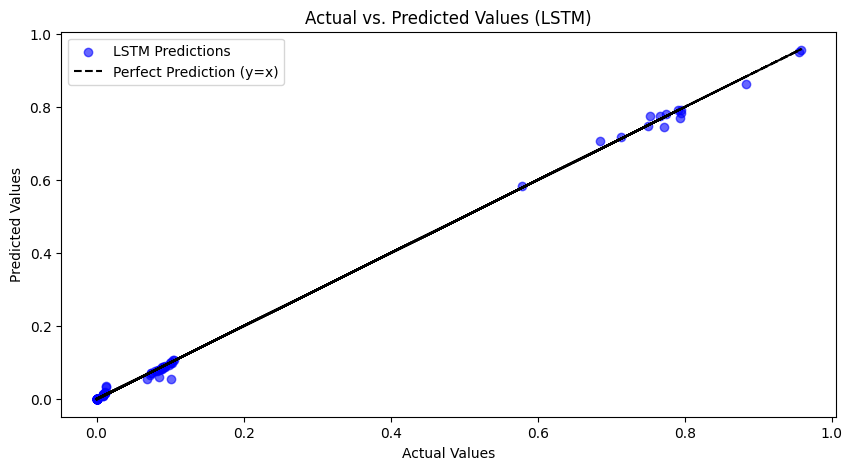

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# 🔹 Load dataset
df = pd.read_csv("/content/cleaned_analysis_cap.csv")  # Update path if needed

# 🔹 Selecting numeric features
features = ['X', 'XI_01', 'XI_02', 'XI_03', 'XI_04', 'XC_01a', 'XC_01b', 'XC_01c', 'XC_01d', 'XC_01e', 'XC_01f',
            'XC_02a', 'XC_02b', 'XC_02c', 'XC_02d', 'XC_02e', 'XC_02f', 'XC_03a', 'XC_03b', 'XC_03c', 'XC_03d',
            'XC_03e', 'XC_03f', 'XC_04a', 'XC_04b', 'XC_04c', 'XC_04d', 'XC_04e', 'XC_04f']

target = 'X'  # Prediction target

# 🔹 Drop missing values
df = df.dropna()

# 🔹 Normalize features
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])

# 🔹 Convert to numpy arrays
X = df[features].values
y = df[target].values

# 🔹 Reshape for LSTM (samples, time steps, features)
X_lstm = X.reshape((X.shape[0], 1, X.shape[1]))

# 🔹 Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_lstm, y, test_size=0.2, random_state=42)

# 🔹 LSTM Model
lstm_model = Sequential([
    LSTM(64, activation='relu', return_sequences=True, input_shape=(X_lstm.shape[1], X_lstm.shape[2])),
    Dropout(0.2),
    LSTM(32, activation='relu', return_sequences=False),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1)  # Output layer
])

lstm_model.compile(optimizer='adam', loss='mse')

# 🔹 Train LSTM Model
lstm_model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

# 🔹 Get LSTM Predictions
y_pred_lstm = lstm_model.predict(X_test)

# 🔹 Compute Metrics
def evaluate_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"=== {model_name} Performance ===")
    print(f"R² Score: {r2:.4f}, MAE: {mae:.4f}, RMSE: {rmse:.4f}\n")
    return r2, mae, rmse

# 🔹 Evaluate LSTM
evaluate_model(y_test, y_pred_lstm, "LSTM")

# 🔹 Visualization: Actual vs. Predicted
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_lstm, alpha=0.6, label="LSTM Predictions", color="blue")
plt.plot(y_test, y_test, color="black", linestyle="--", label="Perfect Prediction (y=x)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.title("Actual vs. Predicted Values (LSTM)")
plt.show()
